In [ ]:
# !pip install matplotlib
# !pip install numpy pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# weather_df = pd.read_csv("weather.csv")
aqi_df = pd.read_csv("pollution_datasets.csv")


In [ ]:
# print(weather_df.columns)
print(aqi_df.columns)
# weather_df.head()
aqi_df.head()

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'roads',
       'dump_sites', 'agricultural_fields', 'Air Quality'],
      dtype='object')


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,roads,dump_sites,agricultural_fields,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319.0,34,4,3,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611.0,28,2,3,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619.0,36,0,11,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551.0,45,3,9,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303.0,27,2,4,Good


In [ ]:
def classify_source(row):

    #  INDUSTRIAL
    if row["SO2"] > 40 and row["Proximity_to_Industrial_Areas"] > 0.6:
        return "industrial"

    #  VEHICULAR
    elif (
        row["NO2"] > 60
        and row["PM2.5"] > 70
        and row["roads"] > 25
    ):
        return "vehicular"

    #  AGRICULTURAL (crop residue / fertilizer impact)
    elif (
        row["PM2.5"] > 80
        and row["agricultural_fields"] > 5
    ):
        return "agricultural"

    # WASTE / BIOMASS BURNING
    elif (
        row["CO"] > 1.2
        and row["dump_sites"] > 1
    ):
        return "waste_burning"

    # DUST / NATURAL
    elif row["PM10"] > 120:
        return "dust"

    # MIXED
    else:
        return "mixed"


aqi_df["pollution_source"] = aqi_df.apply(classify_source, axis=1)
aqi_df["pollution_source"].value_counts()


,count
pollution_source,
mixed,3220
waste_burning,1700
industrial,104
agricultural,97
vehicular,65
dust,15


In [ ]:

aqi_df


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,roads,dump_sites,agricultural_fields,Air Quality,pollution_source
0,29.8,59.1,5.200000,17.9,18.900000,9.2,1.72,6.3,319.0,34,4,3,Moderate,waste_burning
1,28.3,75.6,2.300000,12.2,30.800000,9.7,1.64,6.0,611.0,28,2,3,Moderate,waste_burning
2,23.1,74.7,26.700000,33.8,24.400000,12.6,1.63,5.2,619.0,36,0,11,Moderate,mixed
3,27.1,39.1,6.100000,6.3,13.500000,5.3,1.15,11.1,551.0,45,3,9,Good,mixed
4,26.5,70.7,6.900000,16.0,21.900000,5.6,1.01,12.7,303.0,27,2,4,Good,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,23.9,56.6,167.057343,53.1,62.014345,7.1,1.13,10.8,520.0,40,2,7,Good,vehicular
5197,23.3,70.8,215.429845,36.1,63.315565,8.4,1.43,7.6,450.0,26,0,2,Moderate,vehicular
5198,22.2,59.8,113.329905,10.2,62.273936,8.2,0.90,13.3,408.0,21,1,9,Good,agricultural
5199,19.6,74.7,243.208089,4.6,62.229353,4.1,0.94,10.4,388.0,39,2,0,Good,vehicular


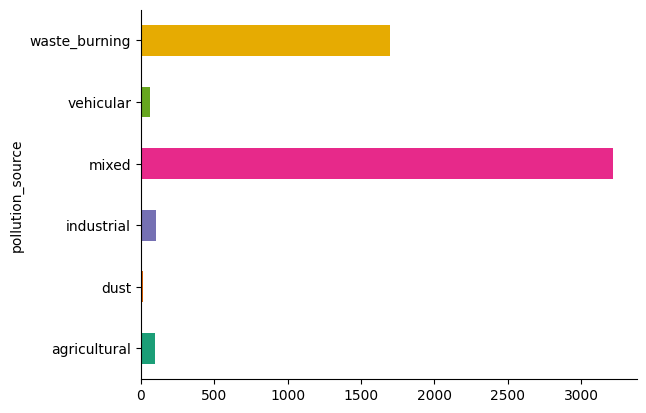

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
aqi_df.groupby('pollution_source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
aqi_df.isnull().sum()

,0
Temperature,1
Humidity,1
PM2.5,1
PM10,1
NO2,1
SO2,1
CO,1
Proximity_to_Industrial_Areas,1
Population_Density,1
roads,0


In [ ]:
aqi_df.dropna(inplace=True)
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 0 to 5199
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5200 non-null   float64
 1   Humidity                       5200 non-null   float64
 2   PM2.5                          5200 non-null   float64
 3   PM10                           5200 non-null   float64
 4   NO2                            5200 non-null   float64
 5   SO2                            5200 non-null   float64
 6   CO                             5200 non-null   float64
 7   Proximity_to_Industrial_Areas  5200 non-null   float64
 8   Population_Density             5200 non-null   float64
 9   roads                          5200 non-null   int64  
 10  dump_sites                     5200 non-null   int64  
 11  agricultural_fields            5200 non-null   int64  
 12  Air Quality                    5200 non-null   object

In [ ]:
aqi_df.isnull().sum()


,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
roads,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

aqi_df['pollution_source'].unique()
labelencoder = LabelEncoder()
aqi_df['pollution_source'] = labelencoder.fit_transform(aqi_df['pollution_source'])

In [ ]:
aqi_df
aqi_df['pollution_source'].value_counts()

,count
pollution_source,
3,3219
5,1700
2,104
0,97
4,65
1,15


In [ ]:
aqi_df.drop(['Air Quality'],axis=1)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,roads,dump_sites,agricultural_fields,pollution_source
0,29.8,59.1,5.200000,17.9,18.900000,9.2,1.72,6.3,319.0,34,4,3,5
1,28.3,75.6,2.300000,12.2,30.800000,9.7,1.64,6.0,611.0,28,2,3,5
2,23.1,74.7,26.700000,33.8,24.400000,12.6,1.63,5.2,619.0,36,0,11,3
3,27.1,39.1,6.100000,6.3,13.500000,5.3,1.15,11.1,551.0,45,3,9,3
4,26.5,70.7,6.900000,16.0,21.900000,5.6,1.01,12.7,303.0,27,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,32.2,87.1,91.579203,64.2,61.700930,15.3,1.44,5.3,666.0,25,0,7,0
5196,23.9,56.6,167.057343,53.1,62.014345,7.1,1.13,10.8,520.0,40,2,7,4
5197,23.3,70.8,215.429845,36.1,63.315565,8.4,1.43,7.6,450.0,26,0,2,4
5198,22.2,59.8,113.329905,10.2,62.273936,8.2,0.90,13.3,408.0,21,1,9,0


In [ ]:
X = aqi_df.drop(["pollution_source", "Air Quality"], axis=1)
y = aqi_df["pollution_source"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)


Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
roads                              int64
dump_sites                         int64
agricultural_fields                int64
dtype: object
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
roads                              int64
dump_sites                         int64
agricultural_fields                int64
dt

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

# Overall accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Per-class performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix (optional)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.989423076923077

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00        20
           3       0.99      1.00      0.99       649
           4       0.75      1.00      0.86        12
           5       0.99      1.00      1.00       340

    accuracy                           0.99      1040
   macro avg       0.94      0.87      0.89      1040
weighted avg       0.99      0.99      0.99      1040


Confusion Matrix:
[[  9   0   0   2   1   2]
 [  0   3   0   2   0   0]
 [  0   0  20   0   0   0]
 [  1   0   0 646   2   0]
 [  0   0   0   0  12   0]
 [  0   0   0   0   1 339]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

#XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    random_state=42,
    eval_metric="mlogloss"
)

# Train
xgb_model.fit(X_train_scaled, y_train_enc)

#Predict
y_pred_enc = xgb_model.predict(X_test_scaled)

#  Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_enc)

# 6) Accuracy & report
acc = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

XGBoost Accuracy: 0.9942307692307693

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.40      0.57         5
           2       1.00      0.95      0.97        20
           3       0.99      1.00      1.00       649
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00       340

    accuracy                           0.99      1040
   macro avg       1.00      0.87      0.91      1040
weighted avg       0.99      0.99      0.99      1040


Confusion Matrix:
[[ 12   0   0   1   0   1]
 [  0   2   0   3   0   0]
 [  0   0  19   1   0   0]
 [  0   0   0 649   0   0]
 [  0   0   0   0  12   0]
 [  0   0   0   0   0 340]]


In [ ]:
import joblib
joblib.dump(xgb_model, "xgboost_pollution_models.pkl")
joblib.dump(scaler, "pollution_scalers.pkl")
joblib.dump(le, "pollution_label_encoders.pkl")


['pollution_label_encoders.pkl']